In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.1          ✔ dplyr   0.8.1     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "master.csv"

As always, the first thing you do when you want to inspect a new data set is to use str() and head() to have a brief overview of its contents:

In [2]:
suicideData <- read.csv("../input/master.csv", stringsAsFactors = FALSE)
str(suicideData)
summary(suicideData)
suicideData %>% 
head()

'data.frame':	27820 obs. of  12 variables:
 $ country           : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ year              : int  1987 1987 1987 1987 1987 1987 1987 1987 1987 1987 ...
 $ sex               : chr  "male" "male" "female" "male" ...
 $ age               : chr  "15-24 years" "35-54 years" "15-24 years" "75+ years" ...
 $ suicides_no       : int  21 16 14 1 9 1 6 4 1 0 ...
 $ population        : int  312900 308000 289700 21800 274300 35600 278800 257200 137500 311000 ...
 $ suicides.100k.pop : num  6.71 5.19 4.83 4.59 3.28 2.81 2.15 1.56 0.73 0 ...
 $ country.year      : chr  "Albania1987" "Albania1987" "Albania1987" "Albania1987" ...
 $ HDI.for.year      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ gdp_for_year....  : chr  "2,156,624,900" "2,156,624,900" "2,156,624,900" "2,156,624,900" ...
 $ gdp_per_capita....: int  796 796 796 796 796 796 796 796 796 796 ...
 $ generation        : chr  "Generation X" "Silent" "Generation X" "G.I. Generation" ...


   country               year          sex                age           
 Length:27820       Min.   :1985   Length:27820       Length:27820      
 Class :character   1st Qu.:1995   Class :character   Class :character  
 Mode  :character   Median :2002   Mode  :character   Mode  :character  
                    Mean   :2001                                        
                    3rd Qu.:2008                                        
                    Max.   :2016                                        
                                                                        
  suicides_no        population       suicides.100k.pop country.year      
 Min.   :    0.0   Min.   :     278   Min.   :  0.00    Length:27820      
 1st Qu.:    3.0   1st Qu.:   97498   1st Qu.:  0.92    Class :character  
 Median :   25.0   Median :  430150   Median :  5.99    Mode  :character  
 Mean   :  242.6   Mean   : 1844794   Mean   : 12.82                      
 3rd Qu.:  131.0   3rd Qu.: 1486143   3rd

country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


**Preprocessing**

RIght off the bat, we can see that the dataset contains a year variable, however, this variable seems to be of the integer type, something that is not particularly helpful when dealing with dates. Instead, I use the year() function from the lubridate package in order to process the variable as a date variable successfully.

Some column names also have trailing dots; I use the rename() function to change the column names to something a bit more palatable.

Seeing as the dataset contains the absolute number of suicides, I decided to use mutate() to create a new variable, suicideRate, that contains the percentage of suicides for the countries present in the dataset, this might help a little bit in dealing with countries with extreme populations.

In [4]:
suicideDataProcessed <- suicideData %>% 
mutate(suicideRate = (suicides_no/population)*100, year = lubridate::year(lubridate::years(year)), country = as.factor(country), generation = as.factor(generation), row_id = row_number()) %>% 
rename(gdp_per_capita = gdp_per_capita...., gdp_for_year = gdp_for_year....)

**Exploratory Data Analysis**

I'll be using ggplot to generate a few visualizations in order to get a better understanding of the underlying patterns in the data set. For example, the first question that comes to mind is to look at the distribution of suicides amongst the different age groups shown in the dataset, I do this using geom_histogram:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


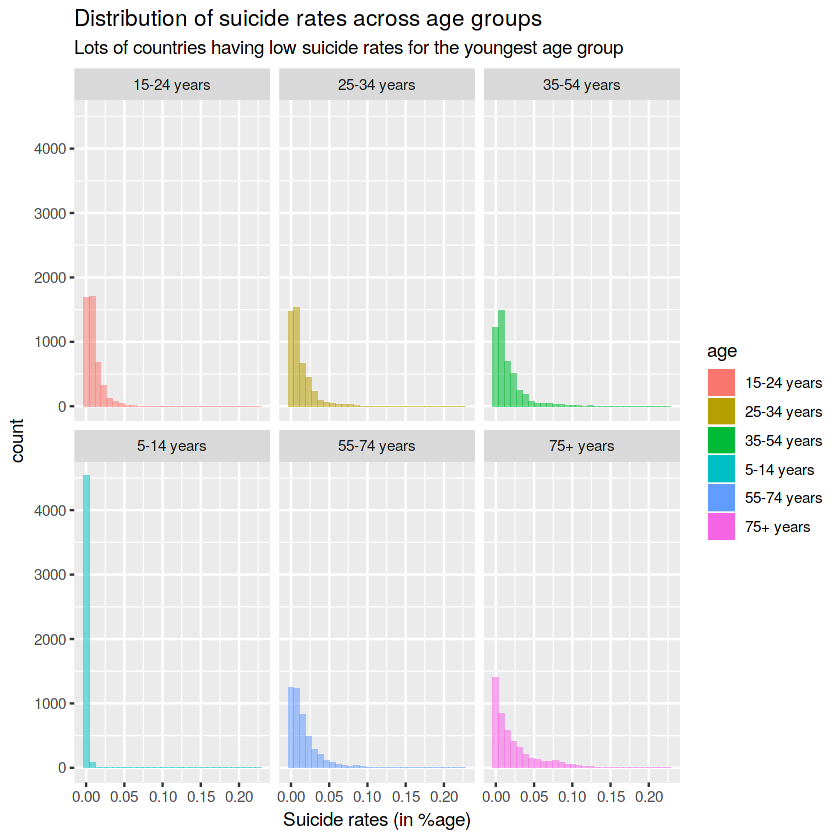

In [7]:
suicideDataProcessed %>% 
ggplot(aes(x = suicideRate, fill = age, alpha = 0.5)) + 
geom_histogram() + 
facet_wrap(~age) +
guides(alpha = FALSE) +
labs(title = "Distribution of suicide rates across age groups", subtitle = "Lots of countries having low suicide rates for the youngest age group", x = "Suicide rates (in %age)")

From the above, we see that there is a very notable spike right at the beginning of the histogram for the youngest age group, this corresponds to the fact that lots of countries have low suicide rates amongst the youth. Notably, the 75+ age group appears to have a slightly more significant tail as compared to the other age groups, indicating the fact that some countries have high suicide rates when it comes to the older age groups.

I plot a similar histogram here, however this time, I look at the distribution of suicide rates amongst the different generations shown in the data set.

I also use an additional aesthetic in the plot to look at the distribution of age groups within generations, mainly because I've always been curious as to which age group belonged to generation X, which age group belonged to generation Y, etc.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


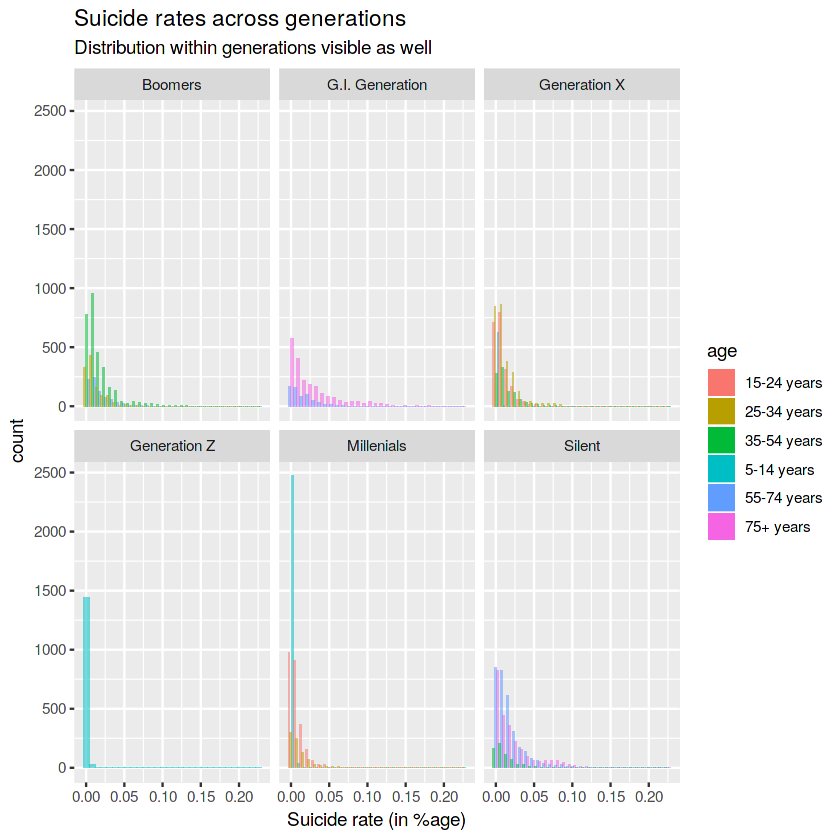

In [8]:
suicideDataProcessed %>% 
ggplot(aes(x = suicideRate, fill = age, alpha = 0.5)) + 
geom_histogram(position = "dodge") + 
facet_wrap(~generation) +
guides(alpha = FALSE) +
labs(title = "Suicide rates across generations", subtitle = "Distribution within generations visible as well", x = "Suicide rate (in %age)")

In [ ]:
This graph largely resembles the previous graph, with major spikes occurring amongst the younger generations.

Recall that our dataset also contains a year variable. I'd love to explore the time-related aspect of the data, which I achieve by using geom_smooth() to inspect the relationship between year and suicideRate.

The method = "lm" in the geom_smooth() call tells the function to plot a linear regression line between the two variables.

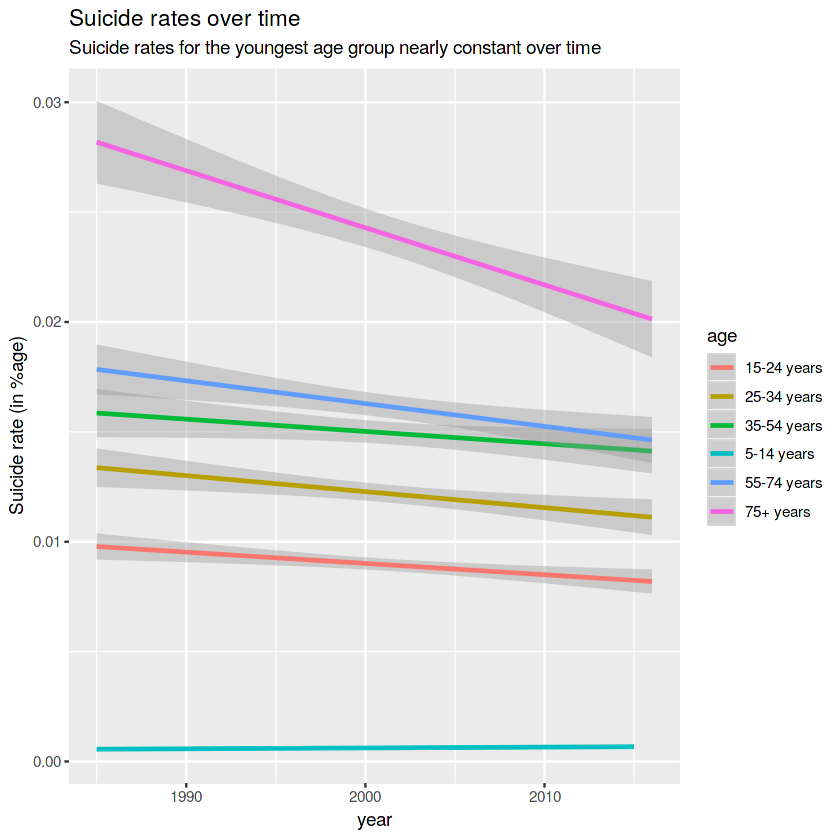

In [9]:
suicideDataProcessed %>% 
ggplot(aes(year, suicideRate, color = age)) +
geom_smooth(method = "lm") +
labs(y = "Suicide rate (in %age)", title = "Suicide rates over time", subtitle = "Suicide rates for the youngest age group nearly constant over time")

The rates show a negative trend over time, especially in the case of the 75+ years age group. This is encouraging news, however, keep in mind that this does not necessarily mean that the suicides have dropped, only that the rates have dropped. The population boom could easily be to blame for this instead of better social and cultural factors in society.

In [10]:
suicideDataProcessed %>% 
select(row_id,country, year, sex, age, gdp_per_capita, gdp_for_year, suicides_no, suicideRate) %>% 
head()

row_id,country,year,sex,age,gdp_per_capita,gdp_for_year,suicides_no,suicideRate
<int>,<fct>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>
1,Albania,1987,male,15-24 years,796,"2,156,624,900",21,0.006711409
2,Albania,1987,male,35-54 years,796,"2,156,624,900",16,0.005194805
3,Albania,1987,female,15-24 years,796,"2,156,624,900",14,0.004832585
4,Albania,1987,male,75+ years,796,"2,156,624,900",1,0.004587156
5,Albania,1987,male,25-34 years,796,"2,156,624,900",9,0.003281079
6,Albania,1987,female,75+ years,796,"2,156,624,900",1,0.002808989


When it comes to inspecting suicides globally, a key question that comes to mind is whether third-world countries tend to have more suicides, corresponding to a lower standards of living, or if first-world countries also have significant numbers of suicides.

We can do this by using group_by() and summarize() to look at the average suicides for each country. Again, I use median instead of mean.

I also use fct_reorder() for reording the factor variables in the graph.

Selecting by medianSuicides


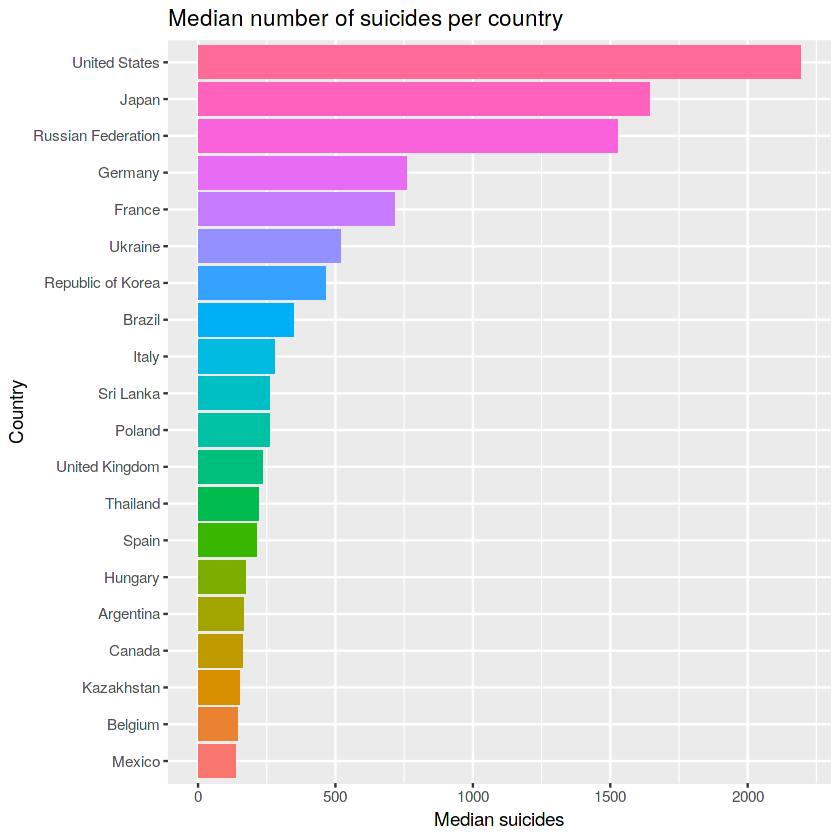

In [11]:
suicideDataProcessed %>% 
group_by(country) %>% 
summarize(count = n(), medianSuicides = median(suicides_no))  %>% 
mutate(country = fct_reorder(country, medianSuicides)) %>% 
top_n(20) %>% 
ungroup() %>% 
ggplot(aes(country, medianSuicides)) + 
geom_col(aes(fill = country)) +
coord_flip() +
labs(title = "Median number of suicides per country", x = "Country", y = "Median suicides") +
guides(fill = FALSE)

The United States and Japan have the highest average number of suicides, in stark contrast to their high standards of living.

In a previous graph, we looked at the distribution of suicide rates across different age groups/generations. Now, we'll be looking at the median number of suicides per age group and generation, in a manner similar to the previous graph.

I convert both the age and generation variables to factor variables in order to use fct_reorder.

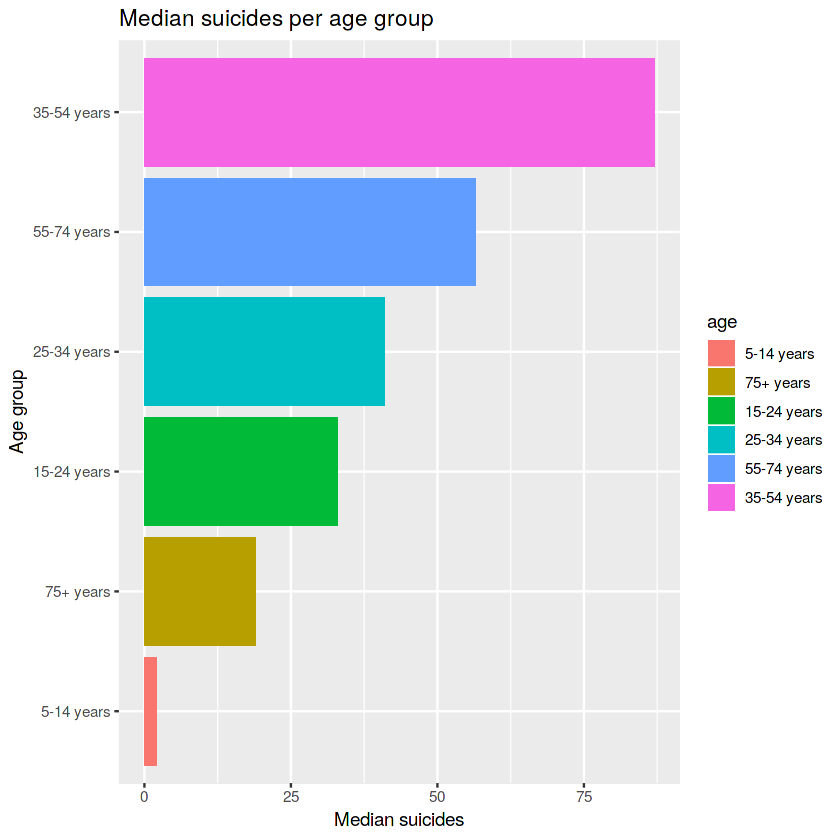

In [12]:
suicideDataProcessed %>% 
group_by(age) %>% 
summarize(count = n(), medianSuicides = median(suicides_no)) %>% 
mutate(age = as.factor(age), age = fct_reorder(age, medianSuicides)) %>% 
ungroup() %>% 
ggplot(aes(age, medianSuicides)) +
geom_col(aes(fill = age)) +
coord_flip() +
labs(title = "Median suicides per age group", x = "Age group", y = "Median suicides")


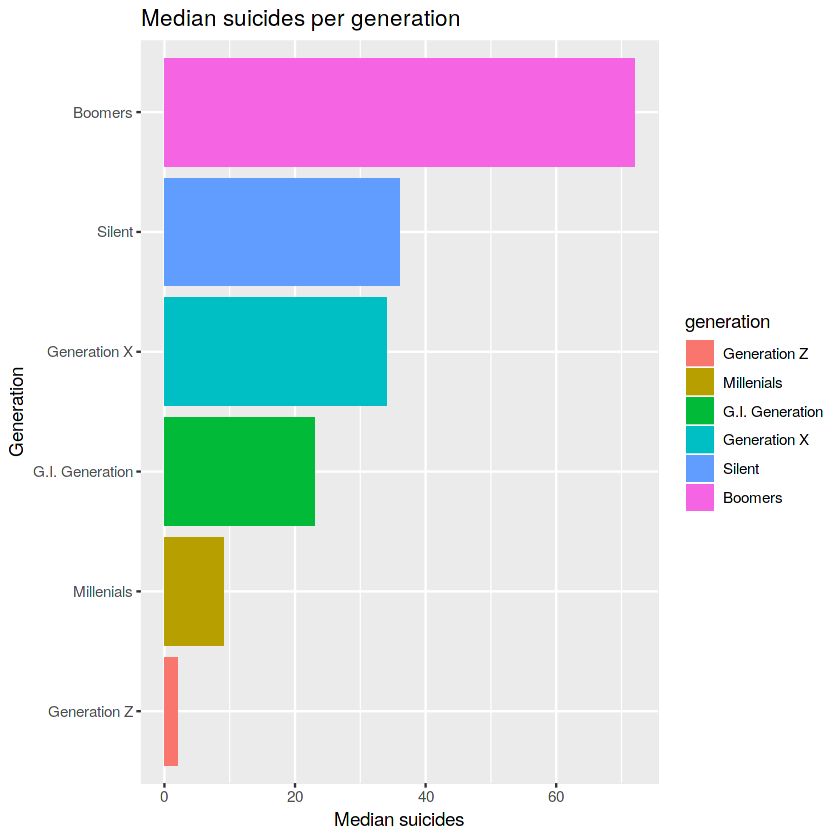

In [13]:
suicideDataProcessed %>% 
group_by(generation) %>% 
summarize(count = n(), medianSuicides = median(suicides_no)) %>% 
mutate(generation = as.factor(generation), generation = fct_reorder(generation, medianSuicides)) %>% 
ungroup() %>% 
ggplot(aes(generation, medianSuicides)) +
geom_col(aes(fill = generation)) +
coord_flip() +
labs(title = "Median suicides per generation", x = "Generation", y = "Median suicides")

Amidst all the news of millenial suicides, we find that it is actually the 35-54 age group that has the highest average suicides in the data.

The graph below this tries to answer a question previously raised over the course of this analysis: the effect of population on the suicide rate. I use geom_smooth() again here to effectively visualise the relationship between the two variables.

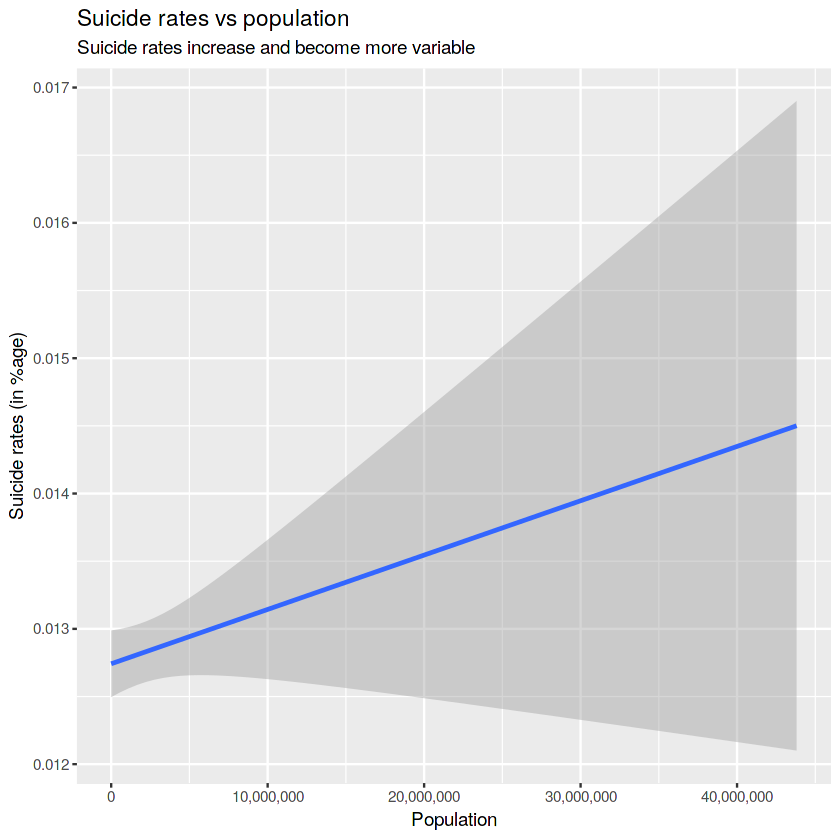

In [14]:
suicideDataProcessed %>% 
select(suicideRate, year, population)  %>% 
ggplot(aes(population, suicideRate)) +
geom_smooth(method = "lm") +
scale_x_continuous(labels = scales::comma_format()) + 
labs(title = "Suicide rates vs population", subtitle = "Suicide rates increase and become more variable", y = "Suicide rates (in %age)", x = "Population")


According to the above graph, suicide rates should be increasing on average as the population increases, however, the variability increases drastically as well, shedding light on the fact that suicide rates do not depend solely on population.

Coming back to looking at the data over the years, I'd like to visualize something similar to a timeline, that tries to show the trends, if any, of suicides over the years. I decided to do this using a basic line plot, achieved using geom_line().

Again, I use group_by() and summarize() to calculate the median number of suicides for each year in the dataset. I use scale_color_continuous to use custom colours for the plot, with red for more suicides, and blue for fewer suicides.

I also vary the sizes of the points in accordance to the median suicides.

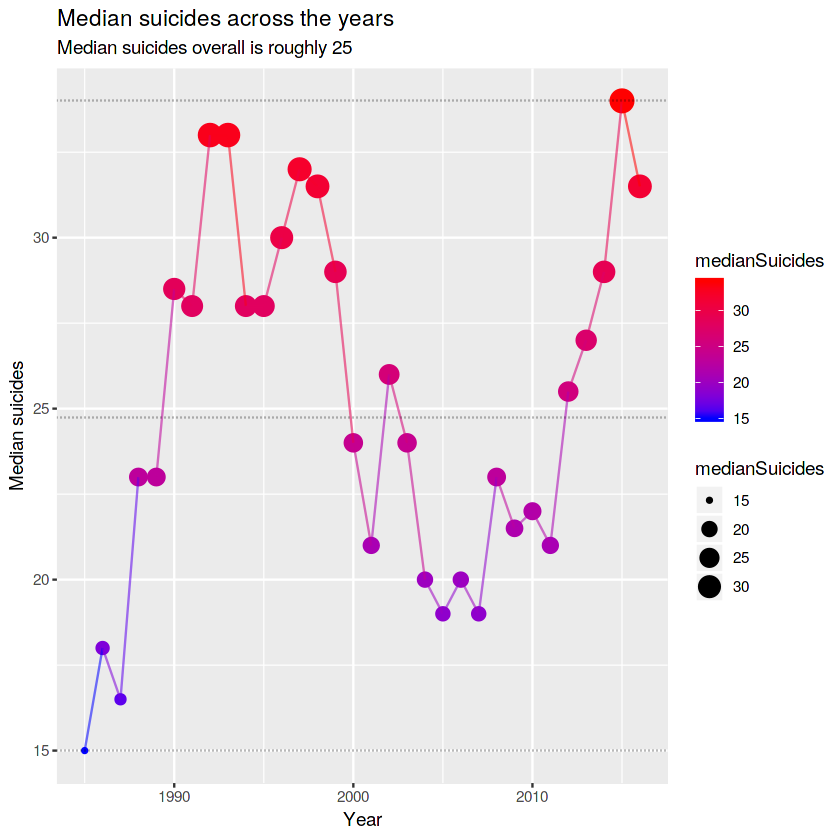

In [15]:
suicideDataProcessed %>% 
group_by(year) %>% 
summarize(count = n(), medianSuicides = median(suicides_no)) %>% 
ungroup() %>% 
ggplot(aes(year, medianSuicides)) +
geom_point(aes(size = medianSuicides, color = medianSuicides)) +
geom_line(aes(color = medianSuicides,alpha = 0.2)) +
geom_hline(aes(yintercept = max(medianSuicides),alpha = 0.2), linetype = "dotted") +
geom_hline(aes(yintercept = median(medianSuicides),alpha = 0.2), linetype = "dotted") +
geom_hline(aes(yintercept = min(medianSuicides),alpha = 0.2), linetype = "dotted") +
#geom_vline(aes(xintercept = max(medianSuicides), alpha = 0.2)) +
scale_color_continuous(low = "blue", high = "red") +
guides(alpha = FALSE) +
labs(title = "Median suicides across the years", subtitle = "Median suicides overall is roughly 25", y = "Median suicides", x = "Year")

This dataset has data related to countries, while also featuring a very convenient country variable. What better way to make use of this than a map visualization?

To do this, I first used the map_data function that is a part of the ggplot2 package, and then store the data in a variable called worldData. I'll use this variable later to plot the full visualization.

In [16]:
worldData <- map_data('world')

str(worldData)

'data.frame':	99338 obs. of  6 variables:
 $ long     : num  -69.9 -69.9 -69.9 -70 -70.1 ...
 $ lat      : num  12.5 12.4 12.4 12.5 12.5 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ subregion: chr  NA NA NA NA ...


In [17]:
countryCount <- function(countryName){
worldData %>% 
filter(str_detect(region, pattern = countryName)) %>% 
group_by(region) %>% 
summarize(count = n())
}

countryNames <- c("Korea", "Antigua", "Barbuda", "Saint", "Trinidad", "Verde")
lapply(countryNames, countryCount)

region,count
<chr>,<int>
North Korea,257
South Korea,260
region,count
<chr>,<int>
Antigua,12
region,count
<chr>,<int>
Barbuda,10
region,count


In [18]:
suicideDataProcessed %>% 
rename(region = country) %>% 
mutate(region = as.character(region)) %>% 
anti_join(worldData) %>% 
group_by(region) %>% 
summarize(count = n())

worldData <- worldData %>% 
mutate(region = ifelse(str_detect(region, "Korea"),"Korea", region),
      region = ifelse(str_detect(region, "Barbuda"),"Antigua", region))

Joining, by = "region"


region,count
<chr>,<int>
Antigua and Barbuda,324
Cabo Verde,12
Macau,12
Republic of Korea,372
Russian Federation,324
Saint Kitts and Nevis,36
Saint Vincent and Grenadines,300
Trinidad and Tobago,324
United Kingdom,372


The worldData variable contains data that will enable me to plot a world map using ggplot, however, I need to plot the dataset I have on top of the world map. To do this, I use a full_join(), after renaming the country column to region.

I also use mutate() to ensure that as many countries are matched as possible, as some of the countries are just labelled differently.

The remainder of the code is pretty similar to what I've been doing so far. I use the viridis package to generate colours for the worldmap.

Loading required package: viridisLite


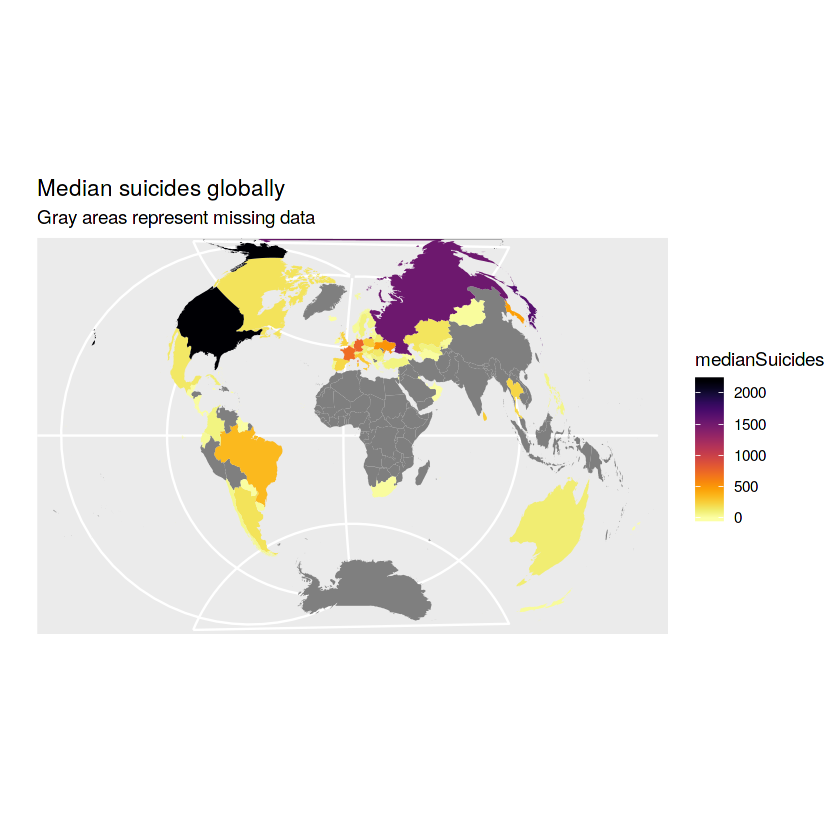

In [19]:
library(viridis)

suicideDataProcessed %>% 
mutate(country = as.character(country), 
       country = ifelse(country == "Russian Federation", "Russia", country),
       country = ifelse(country == "United Kingdom", "UK", country),
       country = ifelse(country == "United States", "USA", country),
       country = ifelse(country == "Trinidad and Tobago", "Trinidad", country),
       country = ifelse(country == "Saint Kitts and Nevis", "Saint Kitts", country),
       country = ifelse(country == "Saint Vincent and Grenadines", "Saint Vincent", country),
       country = ifelse(country == "Cabo Verde", "Cape Verde", country),
       country = ifelse(country == "Antigua and Barbuda", "Antigua", country),
       country = ifelse(country == "Republic of Korea", "Korea", country)
      ) %>%
group_by(country) %>% 
rename(region = country) %>%
summarize(count = n(), medianSuicides = median(suicides_no)) %>% 
full_join(worldData, by = "region") %>% 
ungroup() %>% 
ggplot(aes(x = long, y = lat, group = group)) +
geom_polygon(aes(fill = medianSuicides)) +
scale_fill_viridis(option = "B", direction = -1) +
#scale_fill_gradientn(colors = heat.colors(10)) +
labs(title = "Median suicides globally", subtitle = "Gray areas represent missing data", x = "", y = "") +
coord_map("globular") +
theme(axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks = element_blank()
    )

And there you have it, a world map, coloured according to the average number of suicides per country. Note how dark the US, Japan, and Russia are, this directly corresponds to an earlier graph wherein we plotted the same data using a bar plot.

The graph has a lot of missing data, I tried to eliminate the ones that could be eliminated by simple renaming, but upon closer inspection, the dataset has no information when it comes to countries like China and India, surprisingly.

The original dataset has quite a few variables present, but what I'd like to look at is to see if I can use them to roughly predict suicide numbers for a particular year.

We can create a very basic linear regression model using lm() that uses several dependent variables present in our data to predict the number of suicides, our independent variable. To do so for each country, I use the map function from the purrr package. This enables me to define a function, and apply it to different groups of data.

I first split the data into different data sets using the split() function, this creates a separate data frame for each country present originally. I then use map() as well as lm() to train a linear regression model for each individual country present, after which I again use summary() to generate some information on each individual model trained. The map_dfr() function works similarly to the map() function, with the only difference being that the former returns a dataframe, whereas the latter returns a list.

gather() is used here to reshape the data from the wide format returned by map_dfr to long data, in order to effectively visualize it using ggplot2. I visualize the r.squared metric for each model as a qualitative indicator, with lower values indicating better fits.

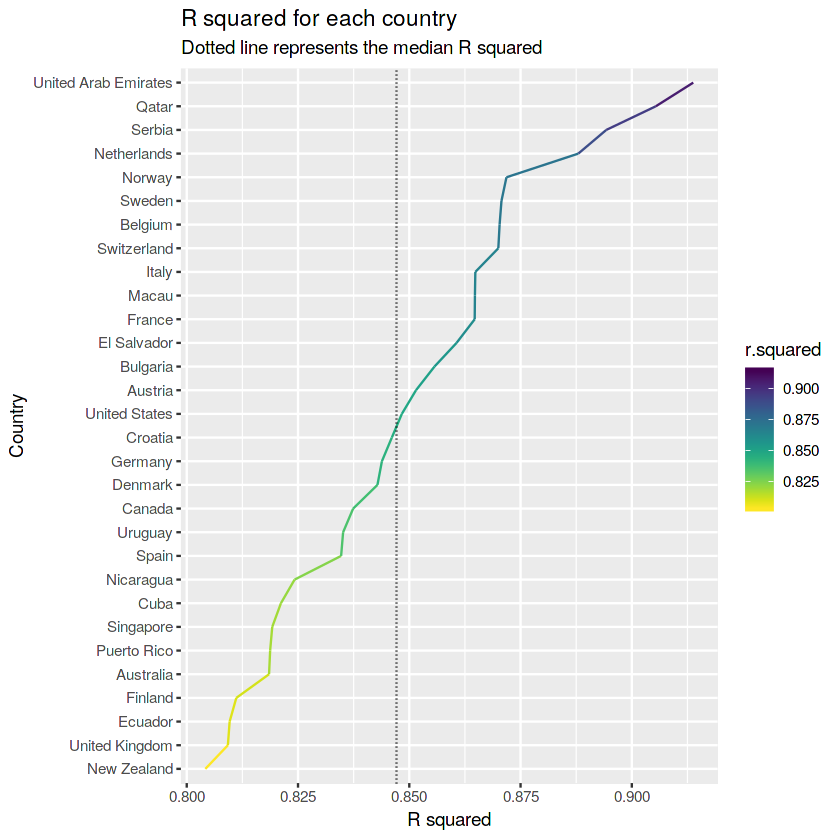

In [20]:
suicideDataProcessed %>% 
select(country, sex, age, suicides_no, population, generation, year) %>% 
mutate(sex = as.factor(sex), age = as.factor(age)) %>% 
split(.$country) %>% 
purrr::map(~lm(suicides_no ~ population + age + sex + generation + year, data = .)) %>% 
purrr::map(summary) %>%   
map_dfr("r.squared") %>% 
gather(country, r.squared, Albania:Uzbekistan) %>% 
mutate(country = as.factor(country), country = fct_reorder(country, r.squared)) %>% 
filter(!is.na(r.squared), r.squared > 0.8) %>% 
ggplot(aes(country, r.squared)) +
geom_line(group = 1, aes(colour = r.squared)) +
geom_hline(aes(yintercept = median(r.squared)), linetype = "dotted") +
coord_flip() +
scale_color_viridis(direction = -1) +
labs(title = "R squared for each country", subtitle = "Dotted line represents the median R squared", x= "Country", y = "R squared")

The next graph works similarly to the previous one, with one key difference lying in its using of the tidy() function from the broom package. This function essentially converts model output to a dataframe, so that it can be manipulated with relative ease using packages like dplyr and ggplot2.

The p-value of a hypothesis test indicates the significance of your results, with low values indicating that the null hypothesis is rejected, and high values indicating that we fail to reject the null hypothesis.

In other words, when training machine learning models, a low p-value associated with a feature generally means that the feature is significant.

We could look at the p-values of the variables associated with our earlier linear model the following way:

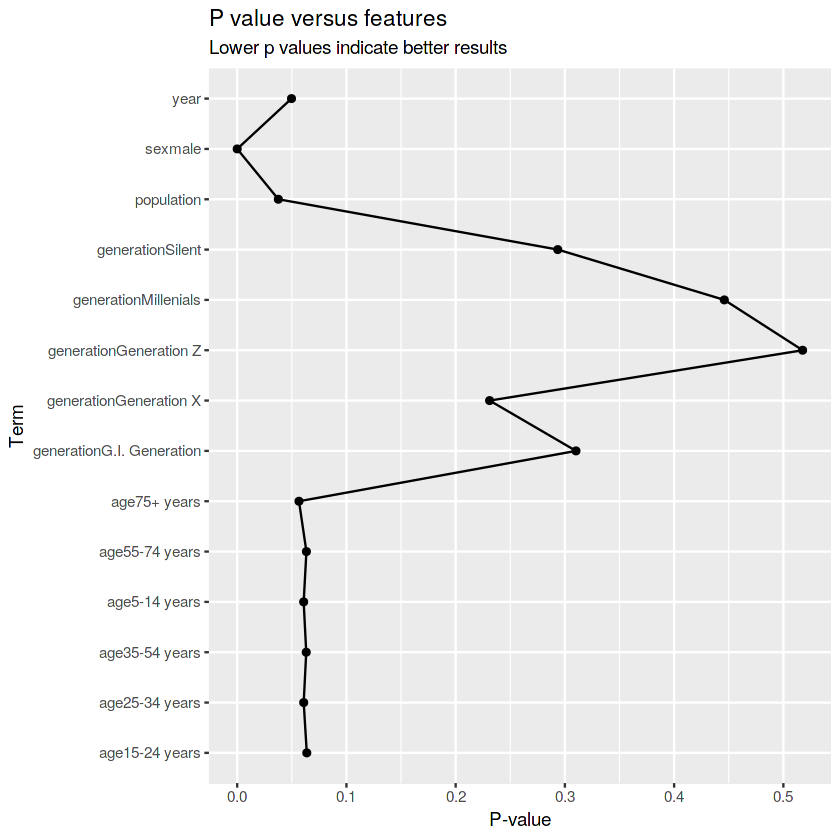

In [21]:
suicideDataProcessed %>% 
select(country, sex, age, suicides_no, population, generation, year) %>% 
mutate(sex = as.factor(sex), age = as.factor(age)) %>% 
split(.$country) %>% 
purrr::map(~lm(suicides_no ~ population + age + sex + generation+year-1, data = .)) %>% 
map_dfr(broom::tidy) %>% 
filter(!is.na(statistic), !is.na(p.value)) %>% 
group_by(term) %>% 
summarize(avEst=median(estimate), avError = median(std.error), avStat = median(statistic), avPValue = median(p.value)) %>% 
ggplot(aes(term, avPValue)) +
geom_point() +
geom_line(group = 1) +
coord_flip() +
labs(title = "P value versus features", subtitle = "Lower p values indicate better results", x = "Term", y = "P-value")

As we can see from the above graph, the year, sex, and population are generally considered strong indicators when it comes to predicting suicides for a particular country, with age groups and generations being comparitively less significant.

**Conclusion**

Some key takeaways that we can take from the data:

Higher standards of living do not necessarily indicate lower suicide rates.
Suicice numbers were decreasing up till 2010, after which they started rising again.
Middle-aged people are more likely to commit suicides globally.
The year, sex, and population are strong indicators when used to predict the number of suicides for a country.
I got to learn a lot of new things while exploring this data, which only leads me to believe I've got so much more to learn when it comes to data analysis. Some things I could've done better:

Use more complicated machine learning algorithms.
Explore the impact of gdp on suicides.
Use broom and purrr a lot more.